In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib  
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# adjusting config. of the plots we will create
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:
#Read csv file
df = pd.read_csv(r'C:\Users\S545242\OneDrive - nwmissouri.edu\Desktop\movies_df.csv')

In [4]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
# check % of missing data using np.mean() to find average in arrays
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# changing data types 
non_finite_mask = df['budget'].isna() | df['budget'].isin([np.inf, -np.inf])
df.loc[non_finite_mask, 'budget'] = 0
df['budget'] = df['budget'].astype('int64')
non_finite_mask = df['gross'].isna() | df['gross'].isin([np.inf, -np.inf])
df.loc[non_finite_mask, 'gross'] = 0
df['gross'] = df['gross'].astype('int64')
non_finite_mask = df['votes'].isna() | df['votes'].isin([np.inf, -np.inf])
df.loc[non_finite_mask, 'votes'] = 0
df['votes'] = df['votes'].astype('int64')

In [8]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [9]:
# create column using first 4 digits of released 
df['yearcorrect']=df['released'].astype(str).str[:4]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July


In [10]:
# ordering by gross revenue
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,Janu
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,Apri
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,Apri
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,Janu


In [11]:
# adding scroll down
pd.set_option('display.max_rows', None)

In [12]:
# Drop any duplicates. Would be like a distinct count 
df['company'].drop_duplicates()

0                                            Warner Bros.
1                                       Columbia Pictures
2                                               Lucasfilm
3                                      Paramount Pictures
4                                          Orion Pictures
6                                      Universal Pictures
7                            Chartoff-Winkler Productions
8                                          Dovemead Films
9                                          United Artists
10                                    The Malpaso Company
11                                           C.A.T. Films
14                                      Filmways Pictures
15                                        Rastar Pictures
16                              Metro-Goldwyn-Mayer (MGM)
17                                              IPC Films
18                                  AVCO Embassy Pictures
20                             Lorimar Film Entertainment
21            

In [13]:
# budget high correlation
# company with high correlation

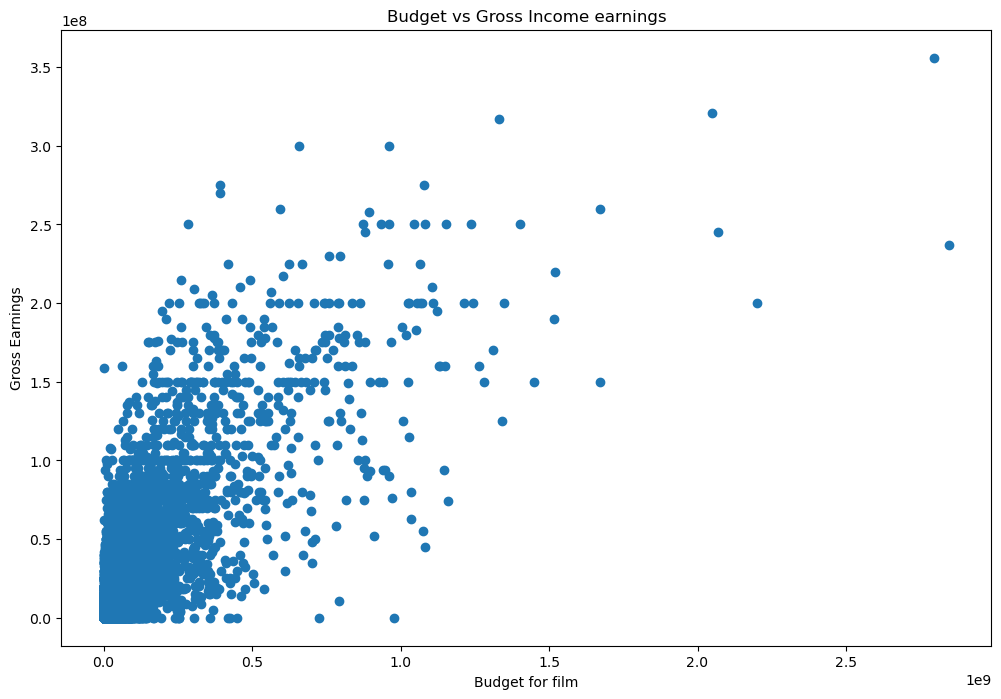

In [14]:
# scatter plot budget vs gross
plt.scatter(x=df['gross'], y=df['budget'])
plt.title('Budget vs Gross Income earnings')
plt.xlabel('Budget for film')
plt.ylabel('Gross Earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

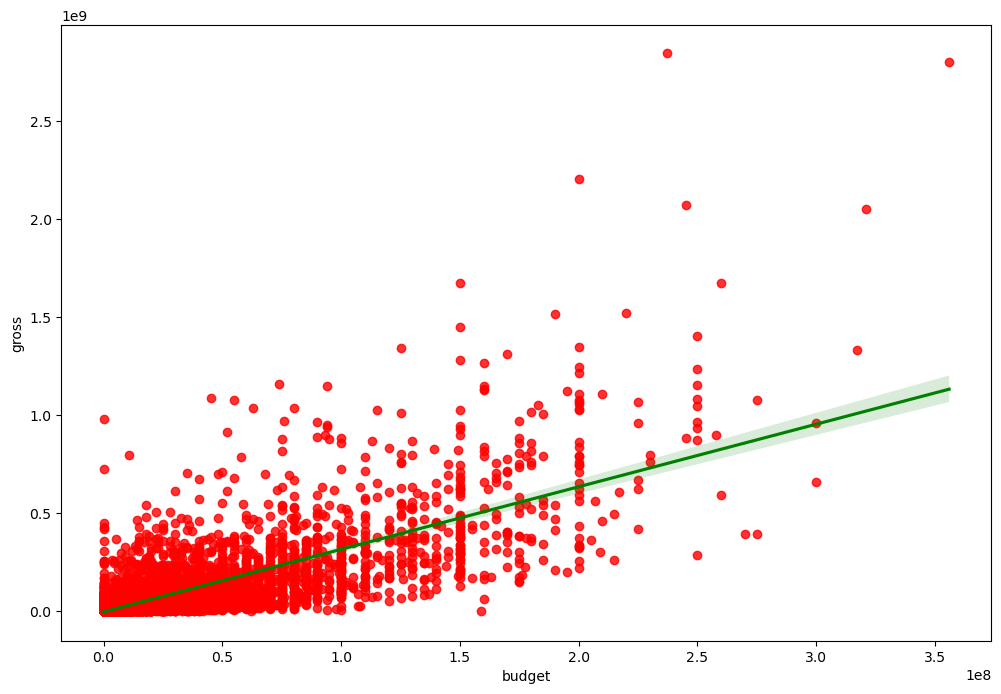

In [15]:
# plot budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"green"})

In [16]:
# analyse correlation
# pearson, kendall, spearman
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222427,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222427,0.409182,1.000000,0.486931,0.632870,0.309122
budget,0.309212,0.055665,0.486931,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632870,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309122,0.269510,0.245235,1.000000


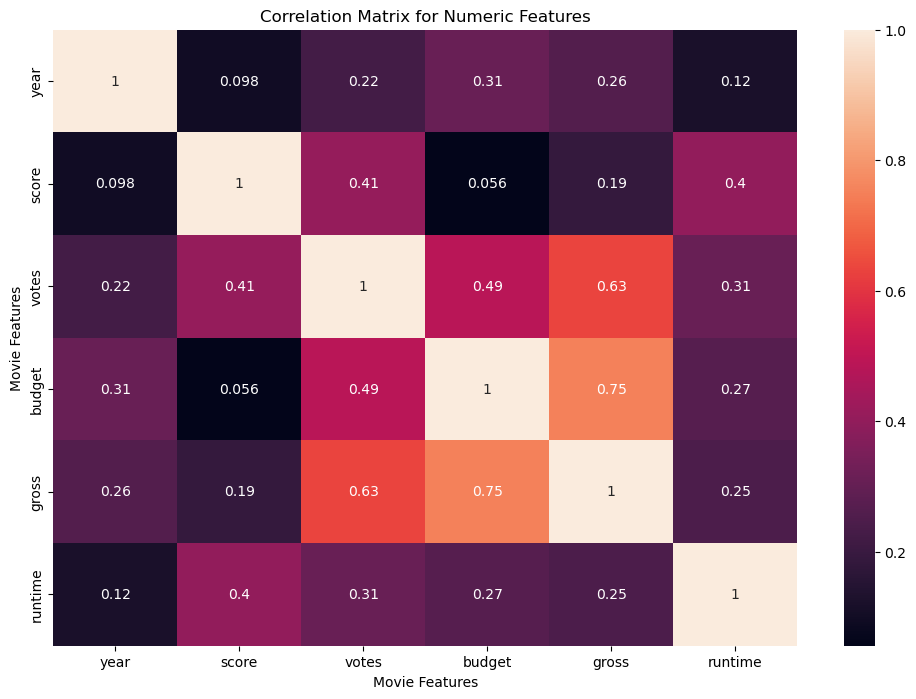

In [17]:
# high correlation between budget and gross using pearson method
# correlation matrix
corr_matrix=df.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [18]:
# just taking a quick look at company
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July


In [19]:
# leave alone numeric value and numerize/populate with random codes other data types 
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1705,8.4,927000,2589,4014,1047,54,19000000,46998772,2319,146.0,14
1,5573,6,1,1980,1492,5.8,65000,2269,1632,327,55,4500000,58853106,731,104.0,13
2,5142,4,0,1980,1771,8.7,1200000,1111,2567,1745,55,18000000,538375067,1540,124.0,14
3,286,4,4,1980,1492,7.7,221000,1301,2000,2246,55,3500000,83453539,1812,88.0,13
4,1027,6,4,1980,1543,7.3,108000,1054,521,410,55,6000000,39846344,1777,98.0,13


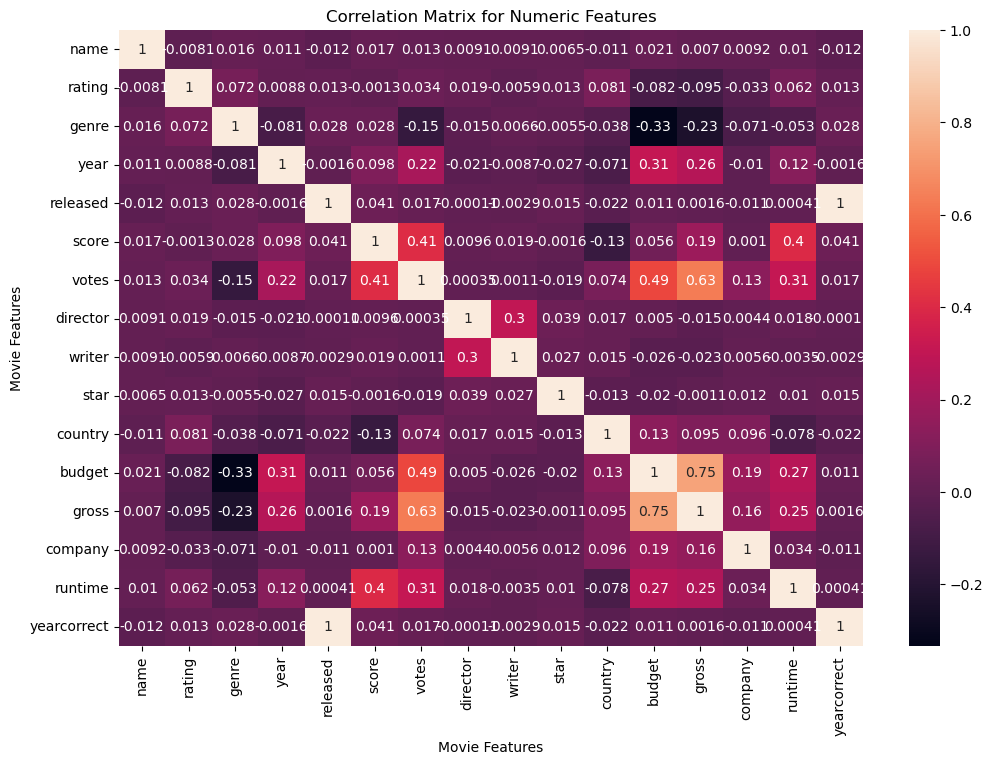

In [92]:
# replacing values in matrix with numerized data frame
corr_matrix=df_numerized.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [93]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.008069,0.016355,0.011453,-0.011725,0.017097,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392,-0.011725
rating,-0.008069,1.000000,0.072423,0.008779,0.013475,-0.001314,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145,0.013475
genre,0.016355,0.072423,1.000000,-0.081261,0.028397,0.027965,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711,0.028397
year,0.011453,0.008779,-0.081261,1.000000,-0.001562,0.097995,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.120811,-0.001562
released,-0.011725,0.013475,0.028397,-0.001562,1.000000,0.040993,0.017107,-0.000105,-0.002892,0.015406,-0.022277,0.010544,0.001606,-0.010726,0.000410,1.000000
score,0.017097,-0.001314,0.027965,0.097995,0.040993,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451,0.040993
votes,0.013038,0.033743,-0.145296,0.222427,0.017107,0.409182,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.632870,0.133457,0.309122,0.017107
director,0.009079,0.019483,-0.015258,-0.020795,-0.000105,0.009559,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624,-0.000105
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002892,0.019416,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511,-0.002892
star,0.006472,0.013405,-0.005477,-0.027242,0.015406,-0.001609,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174,0.015406


In [94]:
# grouping by and comparing each column to others and display their correlation coeficient
corr_mat = df_numerized.corr()
corr_pairs = corr_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011725
             score          0.017097
             votes          0.013038
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.009211
             runtime        0.010392
             yearcorrect   -0.011725
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.013475
             score         -0.001314
             votes          0.033743
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [96]:
# anoher way to look at it ^^^
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.334021
budget       genre         -0.334021
genre        gross         -0.234297
gross        genre         -0.234297
votes        genre         -0.145296
genre        votes         -0.145296
score        country       -0.133348
country      score         -0.133348
rating       gross         -0.095450
gross        rating        -0.095450
rating       budget        -0.081939
budget       rating        -0.081939
year         genre         -0.081261
genre        year          -0.081261
runtime      country       -0.078412
country      runtime       -0.078412
genre        company       -0.071067
company      genre         -0.071067
year         country       -0.070938
country      year          -0.070938
genre        runtime       -0.052711
runtime      genre         -0.052711
country      genre         -0.037615
genre        country       -0.037615
company      rating        -0.032943
rating       company       -0.032943
year         star          -0.027242
s

In [ ]:
# votes and budget have the highest correlation to gross earnings
# company has low correlation